# Reducción de dimensionalidad

Como mencionamos anteriormente, la idea de reducir la dimensionalidad de un dataset es eliminar aquellas dimensiones que son **redundantes** e **irrelevantes**, obteniendo un dataset con menos dimensiones que nos ayude a paliar la maldición de la dimensionalidad.

Podemos poner los métodos de reducción de dimensionalidad en dos categorías:

1. **No-supervisados**. Se enfocan en tratar de **comprimir** el dataset en un espacio de menor dimensionalidad, minimizando la pérdida de información resultante. En esta categoría encontramos al análisis de componentes principales (PCA) y a los autoencoders. 

2. **Supervisados**. Buscan  una representación de menor dimensionalidad **para un objetivo específico**. Por ejemplo, si nuestro objetivo final es construir un clasificador, un método supervisado buscaría llevar los datos a un espacio de menor dimensionalidad que conserve las "fronteras" entre una clase y otra, de modo que un clasificador pueda encontrarlas. 

Dado que estamos trabajando **en el contexto de k-NN**, **hoy estudiaremos un método supervisado**: **el análisis de discriminante lineal**.

## ¿Qué es lo que hace en realidad un clasificador?

Retomemos nuestro dataset de resultados de examen y lo graficamos.

Text(0, 0.5, 'horas_sueno')

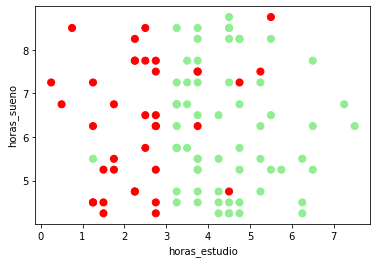

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math

horas_estudio = [5.25, 4.5, 1.75, 1.75, 1.5, 2.75, 3.75, 3.75, 2.75, 0.75, 3.5, 3.75, 2.5, 3.75, 2.75, 3.25, 1.5, 5.5, 4.5, 4.75, 3.25, 4.5, 2.5, 4.25, 3.75, 3.75, 6.5, 4.25, 4.25, 5.5, 3.75, 4.5, 3.5, 2.25, 6.25, 2.75, 4.75, 4.5, 1.75, 5.25, 3.25, 3.5, 5.25, 7.5, 4.25, 3.25, 5.25, 2.75, 3.25, 5.5, 3.75, 4.5, 3.25, 3.75, 1.25, 3.25, 6.25, 0.5, 4.5, 3.75, 7.25, 2.75, 5.75, 3.75, 3.75, 4.5, 3.25, 1.25, 5.5, 4.5, 1.5, 4.75, 3.5, 1.25, 2.5, 4.75, 2.25, 2.5, 2.25, 2.75, 4.75, 3.25, 3.25, 1.25, 4.25, 2.75, 1.25, 0.25, 4.75, 4.75, 3.75, 3.75, 4.75, 6.5, 5.25, 3.25, 2.25, 2.25, 6.25, 6.5]
horas_sueno = [4.75, 4.25, 5.5, 5.25, 4.5, 6.25, 7.5, 7.75, 5.25, 8.5, 5.75, 7.5, 7.75, 7.25, 7.5, 7.25, 4.25, 8.75, 4.75, 8.25, 6.75, 8.25, 5.75, 4.25, 5.25, 5.25, 7.75, 4.75, 6.5, 8.25, 6.5, 4.5, 7.75, 4.75, 5.5, 7.75, 7.25, 4.25, 6.75, 6.25, 5.75, 6.75, 7.25, 6.25, 4.5, 8.5, 7.5, 4.25, 4.5, 6.5, 5.5, 8.75, 6.25, 8.5, 4.5, 5.75, 4.5, 6.75, 8.5, 5.5, 6.75, 6.25, 5.25, 6.25, 4.5, 8.5, 4.75, 6.25, 5.25, 7.25, 5.25, 6.75, 7.25, 7.25, 8.5, 4.25, 4.75, 6.5, 8.25, 6.5, 4.5, 6.75, 5.75, 5.5, 5.5, 4.5, 4.5, 7.25, 8.25, 5.75, 4.75, 8.25, 5.25, 6.25, 5.5, 6.75, 7.75, 7.75, 4.25, 5.25]
resultado_examen = ['APROBADO', 'APROBADO', 'REPROBADO', 'REPROBADO', 'REPROBADO', 'REPROBADO', 'REPROBADO', 'APROBADO', 'REPROBADO', 'REPROBADO', 'APROBADO', 'REPROBADO', 'REPROBADO', 'APROBADO', 'REPROBADO', 'APROBADO', 'REPROBADO', 'REPROBADO', 'REPROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'REPROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'REPROBADO', 'APROBADO', 'REPROBADO', 'REPROBADO', 'APROBADO', 'REPROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'REPROBADO', 'REPROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'REPROBADO', 'APROBADO', 'APROBADO', 'REPROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'REPROBADO', 'APROBADO', 'REPROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'REPROBADO', 'APROBADO', 'APROBADO', 'REPROBADO', 'APROBADO', 'APROBADO', 'REPROBADO', 'REPROBADO', 'APROBADO', 'REPROBADO', 'REPROBADO', 'REPROBADO', 'REPROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'REPROBADO', 'REPROBADO', 'REPROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'REPROBADO', 'REPROBADO', 'APROBADO', 'APROBADO']

plt.scatter(horas_estudio, horas_sueno, c=['lightgreen' if x == 'APROBADO' else 'red' for x in resultado_examen], s=50)
plt.xlabel("horas_estudio")
plt.ylabel("horas_sueno")


Como podemos ver, la gran mayoría de los casos **reprobados** (los rojos) se encuentran en la **izquierda** del gráfico. Por su parte, los casos **aprobados** (los verdes) se encuentran a la **derecha**.

Lo que hace un clasificador, al final, es **encontrar la frontera** que divide estos casos. 

Vamos a ejemplificarlo con varios métodos.

Text(0.5, 1.0, 'LogisticRegression')

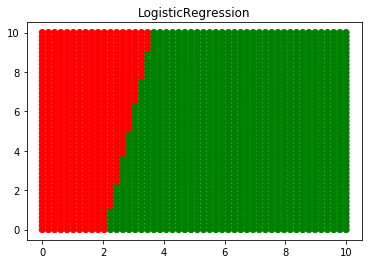

In [4]:
# Generamos un grid de valores para probar
XX, YY = np.meshgrid(np.linspace(0, 10, 50), np.linspace(0, 10, 50))
pos = np.vstack([XX.ravel(), YY.ravel()])

from sklearn.linear_model import LogisticRegression

# Probemos con regresión logística
model_lr = LogisticRegression().fit(np.array((horas_estudio, horas_sueno)).T, resultado_examen)
preds_lr = model_lr.predict(pos.T)
plt.scatter(pos[0], pos[1],c=['green' if x == 'APROBADO' else 'red' for x in preds_lr ]) 
plt.title("LogisticRegression")

Como podemos observar, un modelo de regresión logística **dibuja una línea** para separar las clases rojas de las verdes. Es por eso que lo consideramos un clasificador **lineal**. Otros clasificadores más avanzados dibujan **curvas** y patrones más complejos.

## Análisis de discriminante lineal

Este es nuestro primer método de reducción supervisada. En realidad, el análisis de discriminante lineal puede ser utilizado como un clasificador (en muchos aspectos bastante parecido a la regresión logística), pero tiene la ventaja de que podemos utilizarlo como un método de reducción de dimensionalidad **que preserva la separabilidad entre clases**. 

Utilizarlo en ``scikit-learn`` es fácil: simplemente importamos la clase ``sklearn.discriminant_analysis.LinearDiscriminantAnalysis``.

Vamos a demostrar esto con el dataset de los lirios, el cual tiene 4 dimensiones. 

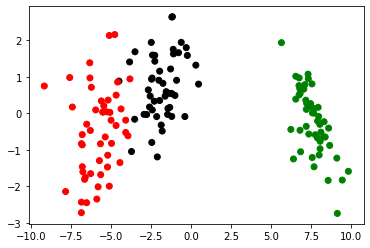

In [30]:
# Carga el dataset de los lirios
l_petalo = [1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4, 1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1, 1.7, 1.9, 1.6, 1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3, 1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5, 4.9, 4, 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4, 4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4, 4.9, 4.7, 4.3, 4.4, 4.8, 5, 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4, 4.4, 4.6, 4, 3.3, 4.2, 4.2, 4.2, 4.3, 3, 4.1, 6, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5, 5.1, 5.3, 5.5, 6.7, 6.9, 5, 5.7, 4.9, 6.7, 4.9, 5.7, 6, 4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5, 5.2, 5.4, 5.1]
a_petalo = [0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1, 0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2, 0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2, 0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1, 1.3, 1.4, 1, 1.5, 1, 1.4, 1.3, 1.4, 1.5, 1, 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7, 1.5, 1, 1.1, 1, 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2, 1.4, 1.2, 1, 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8, 2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2, 1.9, 2.1, 2, 2.4, 2.3, 1.8, 2.2, 2.3, 1.5, 2.3, 2, 2, 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6, 1.9, 2, 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9, 2.3, 2.5, 2.3, 1.9, 2, 2.3, 1.8]
l_sepalo = [5.1, 4.9, 4.7, 4.6, 5, 5.4, 4.6, 5, 4.4, 4.9, 5.4, 4.8, 4.8, 4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5, 5, 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5, 5.5, 4.9, 4.4, 5.1, 5, 4.5, 4.4, 5, 5.1, 4.8, 5.1, 4.6, 5.3, 5, 7, 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5, 5.9, 6, 6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7, 6, 5.7, 5.5, 5.5, 5.8, 6, 5.4, 6, 6.7, 6.3, 5.6, 5.5, 5.5, 6.1, 5.8, 5, 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]
a_sepalo = [3.5, 3, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3, 3, 4, 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3, 3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3, 3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3, 3.8, 3.2, 3.7, 3.3, 3.2, 3.2, 3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2, 3, 2.2, 2.9, 2.9, 3.1, 3, 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3, 2.8, 3, 2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3, 3.4, 3.1, 2.3, 3, 2.5, 2.6, 3, 2.6, 2.3, 2.7, 3, 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3, 2.9, 3, 3, 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3, 2.5, 2.8, 3.2, 3, 3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3, 2.8, 3, 2.8, 3.8, 2.8, 2.8, 2.6, 3, 3.4, 3.1, 3, 3.1, 3.1, 3.1, 2.7, 3.2, 3.3, 3, 2.5, 3, 3.4, 3]
especie = ['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica']

# Creamos una matriz de diseño con las variables independientes
datos_x = np.array((l_petalo, a_petalo, l_sepalo, a_sepalo)).transpose()

# Importamos desde scikit-learn nuestra clase de LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Reduciremos el dataset de 4 a 2 dimensiones usando el parámetro n_components
lda_model = LinearDiscriminantAnalysis(n_components=2).fit(datos_x, especie)
datos_tx = lda_model.transform(datos_x).T

# Y lo dibujamos, verde=setosa / rojo=virginica / negro=versicolor
plt.scatter(datos_tx[0], datos_tx[1], c=['green' if x=='setosa' else 'red' if x=='virginica' else 'black' for x in especie])
plt.show()

Hemos exitosamente llevado nuestro dataset de 4 a 2 dimensiones. Ahora podemos probar cómo se desempeña un clasificador k-NN

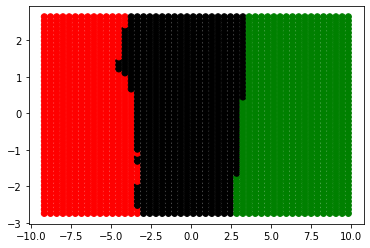

Precisión: 0.98


In [49]:
# Generamos un grid de valores para probar
XX, YY = np.meshgrid(np.linspace(datos_tx[0].min(), datos_tx[0].max(), 50), np.linspace(datos_tx[1].min(), datos_tx[1].max(), 50))
pos = np.vstack([XX.ravel(), YY.ravel()])

from sklearn.neighbors import KNeighborsClassifier

# Creamos el objeto knn donde definimos el valor de k=5
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(datos_tx.T, especie)
preds_knn = knn.predict(pos.T)
plt.scatter(pos[0], pos[1],c=['green' if x=='setosa' else 'red' if x=='virginica' else 'black' for x in preds_knn])
plt.show()

preds_vx = knn.predict(datos_tx.T)
print('Precisión: ' + str(np.array(preds_vx == especie).mean()))